**Λύση 2ης Εργαστηριακής Άσκησης: Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων**

Βασίλης Λυμπεράτος 03115034

In [0]:
%matplotlib inline

import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering

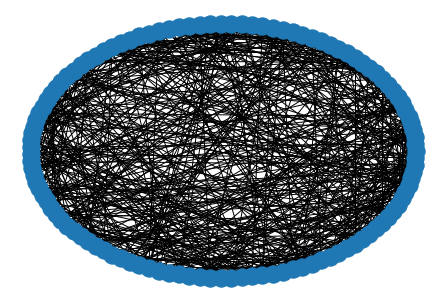

In [0]:
F = nx.read_gml('football.gml')


if(nx.is_directed(F)):
  print("F")
  F = F.to_undirected()

nx.draw_circular(F)

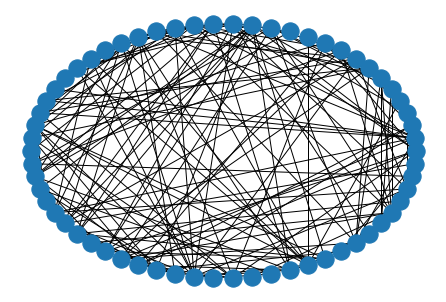

In [0]:
D = nx.read_gml('dolphins.gml')

if(nx.is_directed(D)):
  D = D.to_undirected()
  print("D Κατευθυνόμενος")

nx.draw_circular(D)

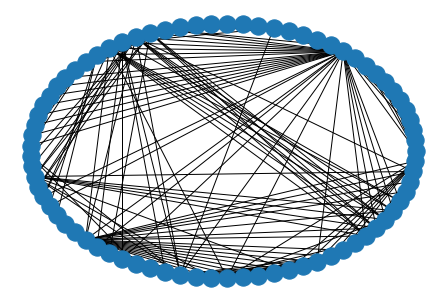

In [0]:
L = nx.read_gml('lesmis.gml')

if(nx.is_directed(L)):
  L = L.to_undirected()
  print("L Κατευθυνόμενος")

nx.draw_circular(L)

In [0]:
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

nF,F_map=conv2int(F,0)
nL, L_map=conv2int(L,0)
nD, D_map=conv2int(D,0)
#G=nx.relabel_nodes(nG,G_map)

In [0]:
G1 = nx.watts_strogatz_graph(140, 4, 0)
REG_degree = nx.degree(G1)
num=dict(REG_degree).values()
mean1 = np.array(list(num)).mean()

G2 = nx.gnm_random_graph(140,750)
RGER_degree=nx.degree(G2)
num=dict(RGER_degree).values()
mean2 = np.array(list(num)).mean()

G3 = nx.random_geometric_graph(100,0.25, dim=2)
RGG_degree = nx.degree(G3)
num=dict(RGG_degree).values()
mean3 = np.array(list(num)).mean()

G4 = nx.barabasi_albert_graph(140, 4)
SF_degree=nx.degree(G4)
num=dict(SF_degree).values()
mean4 = np.array(list(num)).mean()

G5 = nx.watts_strogatz_graph(140, 4, 0.3)
SW_degree = nx.degree(G5)
num=dict(SW_degree).values()
mean5 = np.array(list(num)).mean()

F_degree = nx.degree(F)
num=dict(F_degree).values()
mean6 = np.array(list(num)).mean()

D_degree = nx.degree(D)
num=dict(D_degree).values()
mean7 = np.array(list(num)).mean()

L_degree = nx.degree(L)
num=dict(L_degree).values()
mean8 = np.array(list(num)).mean()

In [0]:
def calculate_clust_coef(G,l):
  C = []
  for i in list(range(l)):
    if(G.degree(i)>1):
      C.append(nx.clustering(G,i))    
    else:
      C.append(0)
  return C

def calculate_clust_coef2(G,l):
  C = []
  P = list(G.degree)
  for i in list(range(l)):
    if(P[i][1]>1):
      C.append(nx.clustering(G,i))    
    else:
      C.append(0)
  return C

REG_cc = calculate_clust_coef(G1,140)
RGER_cc = calculate_clust_coef(G2,140)
SF_cc = calculate_clust_coef(G4,140)
SW_cc = calculate_clust_coef(G5,140)
F_cc = calculate_clust_coef2(nF,115)
D_cc = calculate_clust_coef2(nD,62)
L_cc = calculate_clust_coef2(nL,77)

mean_cc_REG = nx.average_clustering(G1)
mean_cc_RGER = nx.average_clustering(G2)
mean_cc_SW = nx.average_clustering(G4)
mean_cc_SF = nx.average_clustering(G5)
mean_cc_F = nx.average_clustering(F)
mean_cc_L = nx.average_clustering(D)
mean_cc_D = nx.average_clustering(L)

In [0]:
from numpy.linalg import matrix_power

T1 = []
T2 = []
T4 = []
T5 = []
T6 = []
T7 = []
T8 = []

for w in range(1,115):
  g6 = nx.ego_graph(nF,w) 
  A6 = nx.adjacency_matrix(g6)
  A6 = A6.todense()
  I6 = len(A6)
  A66 = matrix_power(A6,2)
  A6 = np.multiply(A66,I6-A6)
  A6 = np.triu(A6)
  A6 = A6[np.nonzero(A6)]
  A6  = A6.astype(float)
  A6 = np.reciprocal(A6).sum()
  T6.append(A6)
T6 = dict(enumerate(T6)) 

for w in range(1,62):
  g7 = nx.ego_graph(nD,w) 
  A7 = nx.adjacency_matrix(g7)
  A7 = A7.todense()
  I7 = len(A7)
  A77 = matrix_power(A7,2)
  A7 = np.multiply(A77,I7-A7)
  A7 = np.triu(A7)
  A7 = A7[np.nonzero(A7)]
  A7  = A7.astype(float)
  A7 = np.reciprocal(A7).sum()
  T7.append(A7)
T7 = dict(enumerate(T7)) 

for w in range(1,77):
  g8 = nx.ego_graph(nL,w) 
  A8 = nx.adjacency_matrix(g8)
  A8 = A8.todense()
  I8 = len(A8)
  A88 = matrix_power(A8,2)
  A8 = np.multiply(A88,I8-A8)
  A8 = np.triu(A8)
  A8 = A8[np.nonzero(A8)]
  A8  = A8.astype(float)
  A8 = np.reciprocal(A8).sum()
  T8.append(A8)
T8 = dict(enumerate(T8)) 


for w in range(1,140):
  g1 = nx.ego_graph(G1,w)
  g2 = nx.ego_graph(G2, w)
  g4 = nx.ego_graph(G4, w)
  g5 = nx.ego_graph(G5, w)

  A1 = nx.adjacency_matrix(g1)
  A2 = nx.adjacency_matrix(g2)
  A4 = nx.adjacency_matrix(g4)
  A5 = nx.adjacency_matrix(g5)

  A1 = A1.todense()
  A2 = A2.todense()
  A4 = A4.todense()
  A5 = A5.todense()

  I1 = len(A1)
  I2 = len(A2)
  I4 = len(A4)
  I5 = len(A5)

  A11 = matrix_power(A1,2)
  A22 = matrix_power(A2,2)
  A44 = matrix_power(A4,2)
  A55 = matrix_power(A5,2)

  A1 = np.multiply(A11,I1-A1)
  A2 = np.multiply(A22,I2-A2)
  A4 = np.multiply(A44,I4-A4)
  A5 = np.multiply(A55,I5-A5)

  A1= np.triu(A1)
  A2 = np.triu(A2)
  A4 = np.triu(A4)
  A5 = np.triu(A5)

  A1 = A1[np.nonzero(A1)]
  A2 = A2[np.nonzero(A2)]
  A4 = A4[np.nonzero(A4)]
  A5 = A5[np.nonzero(A5)]

  A2 = A2.astype(float)
  A2 = np.reciprocal(A2).sum()
  A1 = A1.astype(float)
  A1 = np.reciprocal(A1).sum()
  A4 = A4.astype(float)
  A4 = np.reciprocal(A4).sum()
  A5 = A5.astype(float)
  A5 = np.reciprocal(A5).sum()
  
  T5.append(A5)
  T2.append(A2)
  T1.append(A1)
  T4.append(A4)

T1 = dict(enumerate(T1)) 
T2 = dict(enumerate(T2)) 
T5 = dict(enumerate(T5)) 
T4 = dict(enumerate(T4)) 

mean_ebtw_REG=0
mean_ebtw_RGER=0
mean_ebtw_SW=0
mean_ebtw_SF=0
mean_ebtw_F=0
mean_ebtw_L=0
mean_ebtw_D=0

for i in range(0,139):
  mean_ebtw_REG = mean_ebtw_REG + T1[i]
mean_ebtw_REG = mean_ebtw_REG/140

for i in range(0,139):
  mean_ebtw_RGER = mean_ebtw_RGER + T2[i]
mean_ebtw_RGER = mean_ebtw_RGER/140

for i in range(0,139):
  mean_ebtw_SF = mean_ebtw_SF + T4[i]
mean_ebtw_SF = mean_ebtw_SF/140

for i in range(0,139):
  mean_ebtw_SW = mean_ebtw_SW + T5[i]
mean_ebtw_SW = mean_ebtw_SW/140

for i in range(0,114):
  mean_ebtw_F = mean_ebtw_F + T6[i]
mean_ebtw_F = mean_ebtw_F/115

for i in range(0,61):
  mean_ebtw_D = mean_ebtw_D + T7[i]
mean_ebtw_D = mean_ebtw_D/62

for i in range(0,76):
  mean_ebtw_L = mean_ebtw_L + T8[i]
mean_ebtw_L = mean_ebtw_L/77

In [0]:
print("G1",mean1,mean_cc_REG,mean_ebtw_REG)
print("G2",mean2,mean_cc_RGER,mean_ebtw_RGER)
print("G4",mean4,mean_cc_SF,mean_ebtw_SF)
print("G5",mean5,mean_cc_SW,mean_ebtw_SW)
print("G6",mean6,mean_cc_F,mean_ebtw_F)
print("G7",mean7,mean_cc_D,mean_ebtw_D)
print("G8",mean8,mean_cc_L,mean_ebtw_L)

print("G6 = RGER")
print("G7 = SF")
print("G8 = Sw")

G1 4.0 0.5 2.2670238095238133
G2 10.714285714285714 0.0777218000437814 5.393634674599402
G4 7.771428571428571 0.21428571428571425 3.7320665306344583
G5 4.0 0.13686707255000133 2.3043849206349214
G6 10.660869565217391 0.40321601104209814 3.2483494846538328
G7 5.129032258064516 0.5731367499320134 2.318737568435149
G8 6.597402597402597 0.2589582460550202 1.6867735136587492
G6 = RGER
G7 = SF
G8 = SW


In [0]:
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

In [0]:
from functools import wraps
from itertools import product
from networkx.algorithms import community
import itertools
from networkx import NetworkXError
from networkx.utils import not_implemented_for
from networkx.algorithms.community.community_utils import is_partition

__all__ = ['coverage', 'modularity', 'performance']


class NotAPartition(NetworkXError):
    """Raised if a given collection is not a partition.

    """
    def __init__(self, G, collection):
        msg = '{} is not a valid partition of the graph {}'
        msg = msg.format(G, collection)
        super(NotAPartition, self).__init__(msg)


def modularity(G, communities, weight='weight'):
    
    if not isinstance(communities, list):
        communities = list(communities)
    if not is_partition(G, communities):
        raise NotAPartition(G, communities)

    multigraph = G.is_multigraph()
    directed = G.is_directed()
    m = G.size(weight=weight)
    if directed:
        out_degree = dict(G.out_degree(weight=weight))
        in_degree = dict(G.in_degree(weight=weight))
        norm = 1 / m
    else:
        out_degree = dict(G.degree(weight=weight))
        in_degree = out_degree
        norm = 1 / (2 * m)

    def val(u, v):
        try:
            if multigraph:
                w = sum(d.get(weight, 1) for k, d in G[u][v].items())
            else:
                w = G[u][v].get(weight, 1)
        except KeyError:
            w = 0
        # Double count self-loops if the graph is undirected.
        if u == v and not directed:
            w *= 2
        return w - in_degree[u] * out_degree[v] * norm

    Q = sum(val(u, v) for c in communities for u, v in product(c, repeat=2))
    return Q * norm

comp =community.girvan_newman(G1)
k = 50
k1 =0
ki = 0
l1 = []
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
  tuple(sorted(c) for c in communities) 
  if(ki<modularity(G1,communities)):
    ki = modularity(G1,communities)
    k1 = modularity(G1,communities)
    li = l1 
    l1 = tuple(sorted(c) for c in communities) 

comp =community.girvan_newman(G2)
k = 50
ki = 0
k2 = 0
l2 = []
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
  tuple(sorted(c) for c in communities) 
  if(ki<modularity(G2,communities)):
    ki = modularity(G2,communities)
    k2 = modularity(G2,communities)
    li = l2 
    l2 = tuple(sorted(c) for c in communities) 

comp =community.girvan_newman(G4)
k = 50
ki = 0
k4 = 0
l4 = []
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
  tuple(sorted(c) for c in communities) 
  if(ki<modularity(G4,communities)):
    ki = modularity(G4,communities)
    k4 = modularity(G4,communities)
    li = l4 
    l4 = tuple(sorted(c) for c in communities) 

comp =community.girvan_newman(G5)
k = 50
ki = 0
k5 = 0
l5 = []
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
  tuple(sorted(c) for c in communities) 
  if(ki<modularity(G5,communities)):
    ki = modularity(G5,communities)
    k5 = modularity(G5,communities)
    li = l5 
    l5 = tuple(sorted(c) for c in communities) 

comp =community.girvan_newman(nF)
k = 50
ki = 0
k6 = 0
l6 = []
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
  tuple(sorted(c) for c in communities) 
  if(ki<modularity(nF,communities)):
    ki = modularity(nF,communities)
    k6 = modularity(nF,communities)
    li = l6 
    l6 = tuple(sorted(c) for c in communities) 

comp =community.girvan_newman(nD)
k = 50
ki = 0
k7 = 0
l7 = []
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
  tuple(sorted(c) for c in communities) 
  if(ki<modularity(nD,communities)):
    ki = modularity(nD,communities)
    k7 = modularity(nD,communities)
    li = l7 
    l7 = tuple(sorted(c) for c in communities) 

comp =community.girvan_newman(nL)
k = 50
ki = 0
k8 = 0
l8 = []
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
  tuple(sorted(c) for c in communities) 
  if(ki<modularity(nL,communities)):
    ki = modularity(nL,communities)
    k8 = modularity(nL,communities)
    u = communities
    li = l8 
    l8 = tuple(sorted(c) for c in communities) 

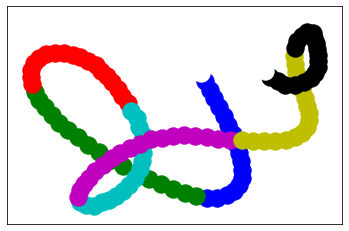

In [0]:
pos = nx.spring_layout(G1)
for i in range(len(l1)):
  nx.draw_networkx_nodes(G1,pos,nodelist=l1[i],node_color=colors[i])
  nx.draw_networkx_edges(G1,pos)

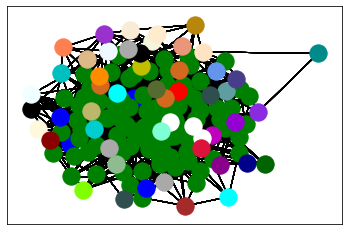

In [0]:
pos = nx.spring_layout(G2)
for i in range(len(l2)):
  nx.draw_networkx_nodes(G2,pos,nodelist=l2[i],node_color=colors[i])
  nx.draw_networkx_edges(G2,pos)

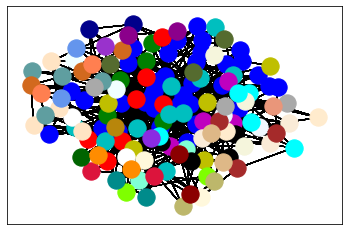

In [0]:
pos = nx.spring_layout(G4)
for i in range(len(l4)):
  nx.draw_networkx_nodes(G4,pos,nodelist=l4[i],node_color=colors[i])
  nx.draw_networkx_edges(G4,pos)

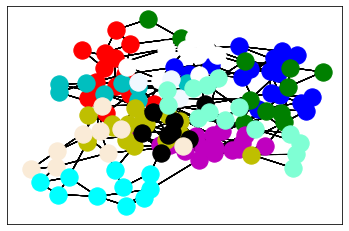

In [0]:
pos = nx.spring_layout(G5)
for i in range(len(l5)):
  nx.draw_networkx_nodes(G5,pos,nodelist=l5[i],node_color=colors[i])
  nx.draw_networkx_edges(G5,pos)

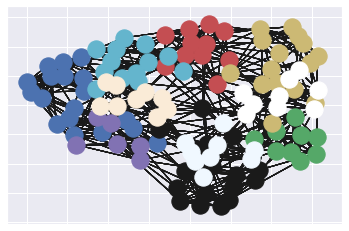

In [0]:
pos = nx.spring_layout(nF)
for i in range(len(l6)):
  nx.draw_networkx_nodes(nF,pos,nodelist=l6[i],node_color=colors[i])
  nx.draw_networkx_edges(nF,pos)

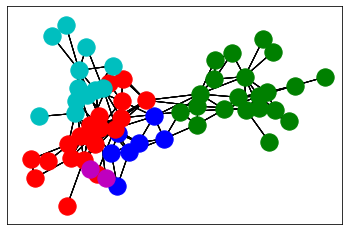

In [0]:
pos = nx.spring_layout(nD)
for i in range(len(l7)):
  nx.draw_networkx_nodes(nD,pos,nodelist=l7[i],node_color=colors[i])
  nx.draw_networkx_edges(nD,pos)

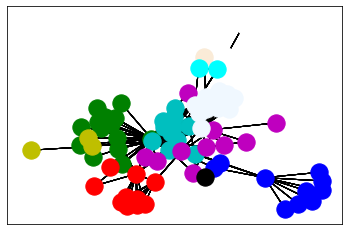

In [0]:
pos = nx.spring_layout(nL)
for i in range(len(l8)):
  nx.draw_networkx_nodes(nL,pos,nodelist=l8[i],node_color=colors[i])
  nx.draw_networkx_edges(nL,pos)

In [0]:
import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets.samples_generator import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()

W1 = nx.adjacency_matrix(G1)
cC1 = SpectralClustering(n_clusters = 50,
    random_state=0, 
    assign_labels = 'discretize')
cC1 = cC1.fit(W1)
W2 = nx.adjacency_matrix(G2)
cC2 = SpectralClustering(n_clusters = 50,
    affinity = 'precomputed', 
    assign_labels = 'discretize')
cC2= cC2.fit(W2)

W4 = nx.adjacency_matrix(G4)
cC4 = SpectralClustering(n_clusters = 50,
    affinity = 'precomputed', 
    assign_labels = 'discretize')
cC4= cC4.fit(W4)

W5 = nx.adjacency_matrix(G5)
cC5 = SpectralClustering(n_clusters = 50,
    affinity = 'precomputed', 
    assign_labels = 'discretize')
cC5= cC5.fit(W5)

W6 = nx.adjacency_matrix(nF)
cC6 = SpectralClustering(n_clusters = 50,
    affinity = 'precomputed', 
    assign_labels = 'discretize')
cC6= cC6.fit(W6)

W7 = nx.adjacency_matrix(nD)
cC7 = SpectralClustering(n_clusters = 50,
    affinity = 'precomputed', 
    assign_labels = 'discretize')
cC7= cC7.fit(W7)

W8 = nx.adjacency_matrix(nL)
cC8 = SpectralClustering(n_clusters = 50,
    affinity = 'precomputed', 
    assign_labels = 'discretize')
cC8= cC8.fit(W8)

rows, cols = (50, len(cC1.labels_)) 
A = [] 
l = 0
for i in range(0,50):
  A.append([])
  for j in range(len(cC1.labels_)):
    if (cC1.labels_[j]==i):
      A[i].append(j)
      l = l + 1

rows, cols = (50, len(cC2.labels_)) 
B = []
l = 0
for i in range(0,50):
  B.append([])
  for j in range(len(cC2.labels_)):
    if (cC2.labels_[j]==i):
      B[i].append(j)
      l = l + 1

rows, cols = (50, len(cC4.labels_)) 
D = [] 
l = 0
for i in range(0,50):
  D.append([])    
  for j in range(len(cC4.labels_)):
    if (cC4.labels_[j]==i):
      D[i].append(j)
      l = l + 1

E = [] 
l = 0
for i in range(0,50):
  E.append([])
  for j in range(len(cC5.labels_)):
    if (cC5.labels_[j]==i):
      E[i].append(j)
      l = l + 1

rows, cols = (50, len(cC6.labels_)) 
F = []
l = 0
for i in range(0,50):
  F.append([])
  for j in range(len(cC6.labels_)):
    if (cC6.labels_[j]==i):
      F[i].append(j)
      l = l + 1

rows, cols = (50, len(cC7.labels_)) 
G = [] 
l = 0
for i in range(0,50):
  G.append([])
  for j in range(len(cC7.labels_)):
    if (cC7.labels_[j]==i):
      G[i].append(j)
      l = l + 1

rows, cols = (50, len(cC8.labels_)) 
H = [] 
l = 0
for i in range(0,50):
  H.append([])
  for j in range(len(cC8.labels_)):
    if (cC8.labels_[j]==i):
      H[i].append(j)
      l = l + 1
print(A)
print(modularity(G1,A))
print(modularity(G2,B))
print(modularity(G4,D))
print(modularity(G5,E))
print(modularity(nF,F))
print(modularity(nD,G))
print(modularity(nL,H))

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


[[0, 3, 6], [35, 38, 41], [133, 136, 139], [91, 94, 97], [80, 81, 83], [49, 52, 55], [7, 10, 13], [108, 109, 111], [66, 67, 69], [119, 122, 125], [21, 24, 27], [84, 87, 90], [42, 45, 48], [14, 17, 20], [98, 101, 104], [56, 59, 62], [112, 115], [129, 132], [70, 73, 76], [31, 34], [1, 135, 138], [79, 82, 85], [93, 96, 99], [37, 40, 43], [65, 68, 71], [107, 110, 113], [51, 54, 57], [9, 12, 15], [23, 26, 29], [121, 124, 127], [2, 4, 5], [100, 103, 106], [30, 32, 33], [16, 18, 19], [72, 75, 78], [128, 130, 131], [114, 116, 117, 118], [44, 46, 47], [86, 88, 89], [58, 61, 64], [120, 123, 126], [60, 63], [22, 25, 28], [74, 77], [102, 105], [134, 137], [8, 11], [36, 39], [50, 53], [92, 95]]
0.058061224489795574
0.1212399999999999
0.16045192203719746
0.4131505102040809
0.09746945596895985
0.05502155769154701
0.09580569161138323


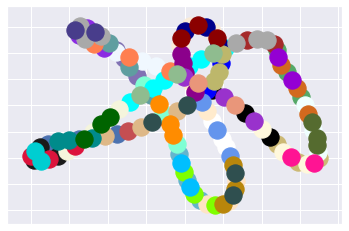

In [0]:
pos = nx.spring_layout(G1)
for i in range(len(A)):
  nx.draw_networkx_nodes(G1,pos,nodelist=A[i],node_color=colors[i])
  nx.draw_networkx_edges(G1,pos)

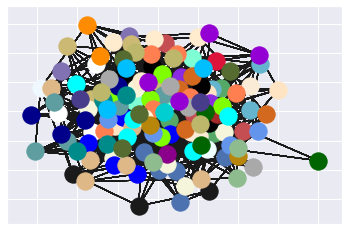

In [0]:
pos = nx.spring_layout(G2)
for i in range(len(B)):
  nx.draw_networkx_nodes(G2,pos,nodelist=B[i],node_color=colors[i])
  nx.draw_networkx_edges(G2,pos)

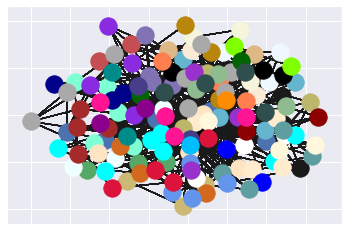

In [0]:
pos = nx.spring_layout(G4)
for i in range(len(D)):
  nx.draw_networkx_nodes(G4,pos,nodelist=D[i],node_color=colors[i])
  nx.draw_networkx_edges(G4,pos)

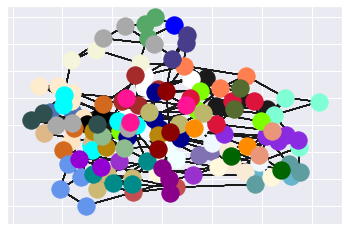

In [0]:
pos = nx.spring_layout(G5)
for i in range(len(E)):
  nx.draw_networkx_nodes(G5,pos,nodelist=E[i],node_color=colors[i])
  nx.draw_networkx_edges(G5,pos)


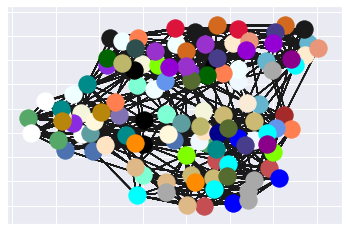

In [0]:
pos = nx.spring_layout(nF)
for i in range(len(F)):
  nx.draw_networkx_nodes(nF,pos,nodelist=F[i],node_color=colors[i])
  nx.draw_networkx_edges(nF,pos)

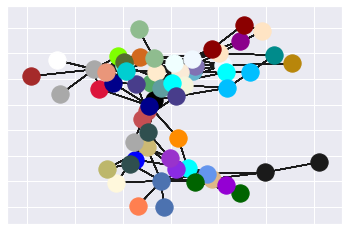

In [0]:
pos = nx.spring_layout(nD)
for i in range(len(G)):
  nx.draw_networkx_nodes(nD,pos,nodelist=G[i],node_color=colors[i])
  nx.draw_networkx_edges(nD,pos)

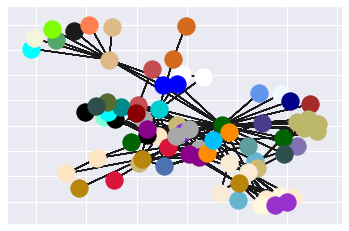

In [0]:
pos = nx.spring_layout(nL)
for i in range(len(H)):
  nx.draw_networkx_nodes(nL,pos,nodelist=H[i],node_color=colors[i])
  nx.draw_networkx_edges(nL,pos)

In [0]:
M1 = list(community.greedy_modularity_communities(G1))
M2 = list(community.greedy_modularity_communities(G2))
M4 = list(community.greedy_modularity_communities(G4))
M5 = list(community.greedy_modularity_communities(G5))
M6 = list(community.greedy_modularity_communities(nF))
M7 = list(community.greedy_modularity_communities(nD))
M8 = list(community.greedy_modularity_communities(nL))

print(modularity(G1,M1))
print(modularity(G2,M2))
print(modularity(G4,M4))
print(modularity(G5,M5))
print(modularity(nF,M6))
print(modularity(nD,M7))
print(modularity(nL,M8))

[frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35}), frozenset({36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71}), frozenset({72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107}), frozenset({128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127})]
0.7065306122449215
0.24772533333333527
0.28773957882785606
0.6384948979591891
0.5497406651426727
0.49549068470392815
0.5005967511935037


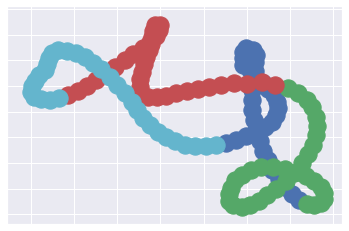

In [0]:
pos = nx.spring_layout(G1)
for i in range(len(M1)):
  nx.draw_networkx_nodes(G1,pos,nodelist=M1[i],node_color=colors[i])
  nx.draw_networkx_edges(G1,pos)

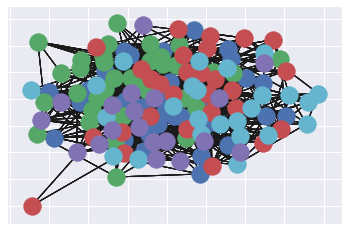

In [0]:
pos = nx.spring_layout(G2)
for i in range(len(M2)):
  nx.draw_networkx_nodes(G2,pos,nodelist=M2[i],node_color=colors[i])
  nx.draw_networkx_edges(G2,pos)

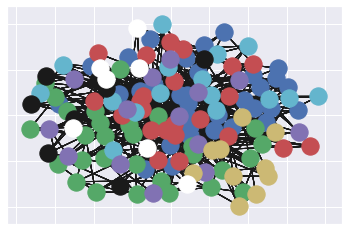

In [0]:
pos = nx.spring_layout(G4)
for i in range(len(M4)):
  nx.draw_networkx_nodes(G4,pos,nodelist=M4[i],node_color=colors[i])
  nx.draw_networkx_edges(G4,pos)

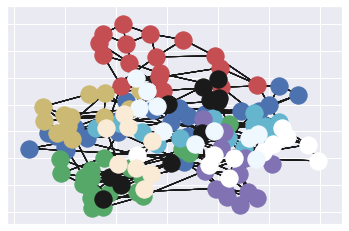

In [0]:
pos = nx.spring_layout(G5)
for i in range(len(M5)):
  nx.draw_networkx_nodes(G5,pos,nodelist=M5[i],node_color=colors[i])
  nx.draw_networkx_edges(G5,pos)

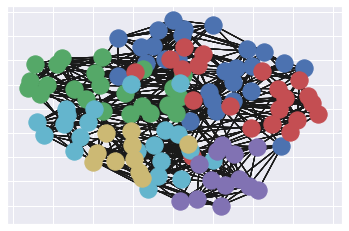

In [0]:
pos = nx.spring_layout(nF)
for i in range(len(M6)):
  nx.draw_networkx_nodes(nF,pos,nodelist=M6[i],node_color=colors[i])
  nx.draw_networkx_edges(nF,pos)

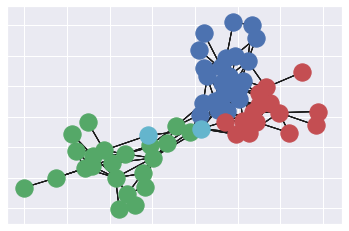

In [0]:
pos = nx.spring_layout(nD)
for i in range(len(M7)):
  nx.draw_networkx_nodes(nD,pos,nodelist=M7[i],node_color=colors[i])
  nx.draw_networkx_edges(nD,pos)

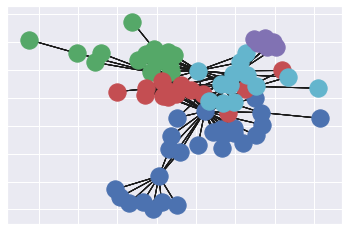

In [0]:
pos = nx.spring_layout(nL)
for i in range(len(M8)):
  nx.draw_networkx_nodes(nL,pos,nodelist=M8[i],node_color=colors[i])
  nx.draw_networkx_edges(nL,pos)

H μέθοδος	SpectralClustering έχει τον μεγαλυτερο αριθμό κοινοτήτων. Μετά πάει η girvan_newman. Τέλος η	greedy_modularity_communities.